### Data 620 - Week 6 Assignment
### Bikram Barua and Leticia Salazar
### March 5, 2023

#### Task:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

#### Dataset:

These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

One 18×14 matrix, binary.

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

#### Import Data

Below we are using the code provided to us

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


/var/folders/xs/s7qlj6l16qj7704tpbyx6rr80000gn/T/ipykernel_19973/1128200402.py:6: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


In [3]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


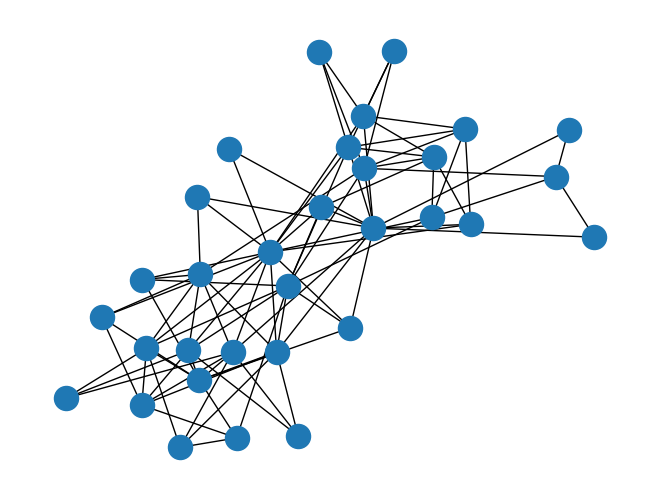

In [5]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

### Now our code and analysis below:

Let's check how many nodes and edges we have:

In [6]:
print(W)

Graph with 18 nodes and 139 edges


... and the degrees:

In [7]:
print(W.degree)

[('Evelyn Jefferson', 17), ('Laura Mandeville', 15), ('Theresa Anderson', 17), ('Brenda Rogers', 15), ('Charlotte McDowd', 11), ('Frances Anderson', 15), ('Eleanor Nye', 15), ('Pearl Oglethorpe', 16), ('Ruth DeSand', 17), ('Verne Sanderson', 17), ('Myra Liddel', 16), ('Katherina Rogers', 16), ('Sylvia Avondale', 17), ('Nora Fayette', 17), ('Helen Lloyd', 17), ('Dorothy Murchison', 16), ('Olivia Carleton', 12), ('Flora Price', 12)]


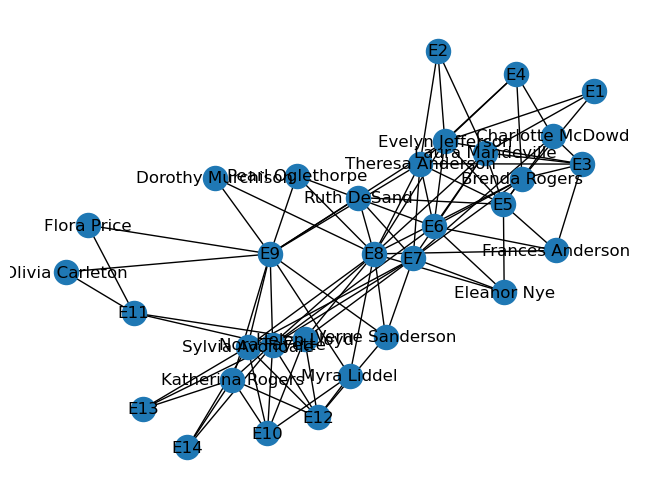

In [8]:
nx.draw(G, with_labels=True)
plt.show()

In [9]:
W.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price'))

In [10]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

In [11]:
W.edges()

EdgeView([('Evelyn Jefferson', 'Helen Lloyd'), ('Evelyn Jefferson', 'Sylvia Avondale'), ('Evelyn Jefferson', 'Laura Mandeville'), ('Evelyn Jefferson', 'Flora Price'), ('Evelyn Jefferson', 'Katherina Rogers'), ('Evelyn Jefferson', 'Brenda Rogers'), ('Evelyn Jefferson', 'Nora Fayette'), ('Evelyn Jefferson', 'Frances Anderson'), ('Evelyn Jefferson', 'Myra Liddel'), ('Evelyn Jefferson', 'Dorothy Murchison'), ('Evelyn Jefferson', 'Charlotte McDowd'), ('Evelyn Jefferson', 'Eleanor Nye'), ('Evelyn Jefferson', 'Verne Sanderson'), ('Evelyn Jefferson', 'Ruth DeSand'), ('Evelyn Jefferson', 'Pearl Oglethorpe'), ('Evelyn Jefferson', 'Theresa Anderson'), ('Evelyn Jefferson', 'Olivia Carleton'), ('Laura Mandeville', 'Helen Lloyd'), ('Laura Mandeville', 'Sylvia Avondale'), ('Laura Mandeville', 'Katherina Rogers'), ('Laura Mandeville', 'Brenda Rogers'), ('Laura Mandeville', 'Nora Fayette'), ('Laura Mandeville', 'Frances Anderson'), ('Laura Mandeville', 'Myra Liddel'), ('Laura Mandeville', 'Dorothy Murc

In [12]:
#Degree Centrality
deg_centrality = nx.degree_centrality(G)
  
# G is the  Graph
print(deg_centrality)

{'Evelyn Jefferson': 0.25806451612903225, 'Laura Mandeville': 0.22580645161290322, 'Theresa Anderson': 0.25806451612903225, 'Brenda Rogers': 0.22580645161290322, 'Charlotte McDowd': 0.12903225806451613, 'Frances Anderson': 0.12903225806451613, 'Eleanor Nye': 0.12903225806451613, 'Pearl Oglethorpe': 0.0967741935483871, 'Ruth DeSand': 0.12903225806451613, 'Verne Sanderson': 0.12903225806451613, 'Myra Liddel': 0.12903225806451613, 'Katherina Rogers': 0.1935483870967742, 'Sylvia Avondale': 0.22580645161290322, 'Nora Fayette': 0.25806451612903225, 'Helen Lloyd': 0.16129032258064516, 'Dorothy Murchison': 0.06451612903225806, 'Olivia Carleton': 0.06451612903225806, 'Flora Price': 0.06451612903225806, 'E1': 0.0967741935483871, 'E2': 0.0967741935483871, 'E3': 0.1935483870967742, 'E4': 0.12903225806451613, 'E5': 0.25806451612903225, 'E6': 0.25806451612903225, 'E7': 0.3225806451612903, 'E8': 0.45161290322580644, 'E9': 0.3870967741935484, 'E10': 0.16129032258064516, 'E11': 0.12903225806451613, 'E1

In [34]:
for node in G.nodes():
    print(node, nx.degree_centrality(G)[node])

Evelyn Jefferson 0.25806451612903225
Laura Mandeville 0.22580645161290322
Theresa Anderson 0.25806451612903225
Brenda Rogers 0.22580645161290322
Charlotte McDowd 0.12903225806451613
Frances Anderson 0.12903225806451613
Eleanor Nye 0.12903225806451613
Pearl Oglethorpe 0.0967741935483871
Ruth DeSand 0.12903225806451613
Verne Sanderson 0.12903225806451613
Myra Liddel 0.12903225806451613
Katherina Rogers 0.1935483870967742
Sylvia Avondale 0.22580645161290322
Nora Fayette 0.25806451612903225
Helen Lloyd 0.16129032258064516
Dorothy Murchison 0.06451612903225806
Olivia Carleton 0.06451612903225806
Flora Price 0.06451612903225806
E1 0.0967741935483871
E2 0.0967741935483871
E3 0.1935483870967742
E4 0.12903225806451613
E5 0.25806451612903225
E6 0.25806451612903225
E7 0.3225806451612903
E8 0.45161290322580644
E9 0.3870967741935484
E10 0.16129032258064516
E11 0.12903225806451613
E12 0.1935483870967742
E13 0.0967741935483871
E14 0.0967741935483871


Evelyn Jefferson, Theresa Anderson and Nora Fayette have high degree centrality.

In [14]:
for node in G.nodes():
    print(node, nx.closeness_centrality(G, node))

Evelyn Jefferson 0.5166666666666667
Laura Mandeville 0.4696969696969697
Theresa Anderson 0.5166666666666667
Brenda Rogers 0.4696969696969697
Charlotte McDowd 0.3875
Frances Anderson 0.4305555555555556
Eleanor Nye 0.4305555555555556
Pearl Oglethorpe 0.4305555555555556
Ruth DeSand 0.45588235294117646
Verne Sanderson 0.45588235294117646
Myra Liddel 0.44285714285714284
Katherina Rogers 0.4696969696969697
Sylvia Avondale 0.5
Nora Fayette 0.5166666666666667
Helen Lloyd 0.4696969696969697
Dorothy Murchison 0.4189189189189189
Olivia Carleton 0.3780487804878049
Flora Price 0.3780487804878049
E1 0.36904761904761907
E2 0.36904761904761907
E3 0.3974358974358974
E4 0.3780487804878049
E5 0.4189189189189189
E6 0.484375
E7 0.5166666666666667
E8 0.5961538461538461
E9 0.5535714285714286
E10 0.3875
E11 0.3780487804878049
E12 0.3974358974358974
E13 0.36904761904761907
E14 0.36904761904761907


Many nodes have similar high closeness.

In [15]:
for node in G.nodes(): 
    print(node, nx.betweenness_centrality(G)[node])

Evelyn Jefferson 0.09243053952845212
Laura Mandeville 0.04914868366576943
Theresa Anderson 0.08382717212549207
Brenda Rogers 0.04735814390994237
Charlotte McDowd 0.010140350205990675
Frances Anderson 0.010253510918225078
Eleanor Nye 0.009037924491193493
Pearl Oglethorpe 0.006507836308894933
Ruth DeSand 0.01606125402625199
Verne Sanderson 0.015060776907855697
Myra Liddel 0.01564136563963574
Katherina Rogers 0.0453256463296124
Sylvia Avondale 0.06862488078028632
Nora Fayette 0.10858130346049079
Helen Lloyd 0.0405644200615806
Dorothy Murchison 0.0018695041988760154
Olivia Carleton 0.00483710716158534
Flora Price 0.00483710716158534
E1 0.00209408273924403
E2 0.0020303032187582275
E3 0.017714891753424267
E4 0.007486726470019202
E5 0.03664061940065164
E6 0.06319868906402719
E7 0.1258812653738273
E8 0.23700300426238308
E9 0.21920891071174742
E10 0.011122410270192064
E11 0.01911560576755823
E12 0.017588323198345388
E13 0.00217801399243785
E14 0.00217801399243785


Nora Fayette has the highest betweeness.

In [16]:
for node in G.nodes(): 
    print(node, nx.eigenvector_centrality(G, max_iter=1000)[node])

Evelyn Jefferson 0.23669199956593817
Laura Mandeville 0.21865425850665976
Theresa Anderson 0.262027292675683
Brenda Rogers 0.22132997761985013
Charlotte McDowd 0.11894468975911866
Frances Anderson 0.14776178887216462
Eleanor Nye 0.16146463160228736
Pearl Oglethorpe 0.12729996701762156
Ruth DeSand 0.1669052290864312
Verne Sanderson 0.15443075747425528
Myra Liddel 0.13208020380055685
Katherina Rogers 0.15576908782477517
Sylvia Avondale 0.19599165124742376
Nora Fayette 0.18660813789991867
Helen Lloyd 0.14189261798243372
Dorothy Murchison 0.09293861503197146
Olivia Carleton 0.04919374969881626
Flora Price 0.04919374969881626
E1 0.1003691529427341
E2 0.10640565406401606
E3 0.17879448898670355
E4 0.12444520652004003
E5 0.227500512695069
E6 0.2316623040078495
E7 0.2711782244726617
E8 0.35824435911378705
E9 0.2683424242623056
E10 0.12049201761650306
E11 0.06331895428788441
E12 0.14339822990089227
E13 0.07985451587221752
E14 0.07985451587221752


Eigenvector centrality uses this matrix to compute its largest, most unique eigenvalues.
The resulting eigenvector is used as the metric. The basic idea behind this metric revolves around a nodes neighbors 
and how connected they are.

To score higher, a node needs to be well connected (high degree centrality) but it also needs to be connected to others
that are well connected.

Evelyn Jefferson has the largest eigenvector centrality. It is interesting to note that maximum of all four centrality measurements are on separate nodes.

#### References:
* Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
* Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.